# Exploring Visual Genome

In [30]:
! ln -s /usr/local/courses/lt2318/data/ data

ln: failed to create symbolic link 'data/data': File exists


In [31]:
! ls data/visual_genome/

image_data.json      images2.zip  relationships.json	  VG_100K
image_data.json.zip  images.zip   relationships.json.zip  VG_100K_2


### Load python libraries

In [32]:
import json
from collections import Counter, defaultdict
import numpy as np

%matplotlib inline
from matplotlib import pyplot as plt

### Load/read the dataset

In [33]:
# read from file
relationships_from_file = json.load(open('data/visual_genome/relationships.json'))

# name/names correction for reading content of nodes in the dataset
name_extract = lambda x: x['names'][0].lower() if 'names' in x and len(x['names']) else x['name'].lower() if 'name' in x else '' 

In [34]:
print('number of images:', len(relationships_from_file))

number of images: 108077


In [35]:
image_data_from_file = json.load(open('data/visual_genome/image_data.json'))
image_id_to_size = {
    image_data['image_id']: (image_data['width'], image_data['height'])
    for image_data in image_data_from_file
}

In [36]:
image_id_to_size

{1: (800, 600),
 2: (800, 600),
 3: (640, 480),
 4: (640, 480),
 5: (800, 600),
 6: (800, 600),
 7: (800, 600),
 8: (800, 600),
 9: (640, 480),
 10: (800, 600),
 11: (800, 600),
 12: (800, 600),
 13: (800, 600),
 14: (800, 600),
 15: (800, 600),
 16: (800, 600),
 17: (800, 640),
 18: (800, 600),
 19: (800, 600),
 20: (800, 600),
 21: (256, 256),
 22: (800, 600),
 23: (800, 600),
 24: (800, 600),
 25: (800, 600),
 26: (800, 600),
 27: (800, 600),
 28: (800, 600),
 29: (800, 600),
 30: (800, 600),
 31: (800, 600),
 32: (800, 600),
 33: (800, 600),
 34: (800, 600),
 35: (800, 600),
 36: (800, 600),
 37: (800, 600),
 38: (782, 800),
 39: (800, 534),
 40: (560, 800),
 41: (800, 600),
 42: (800, 600),
 43: (800, 600),
 44: (800, 600),
 45: (800, 600),
 46: (800, 600),
 47: (800, 600),
 48: (800, 600),
 49: (600, 800),
 50: (800, 600),
 51: (800, 533),
 52: (800, 600),
 53: (800, 534),
 54: (800, 600),
 55: (800, 600),
 56: (800, 600),
 57: (800, 600),
 58: (800, 600),
 59: (800, 600),
 60: (

In [37]:
def get_description(relations_data):
    triplet = (
        name_extract(relation_data['subject']),
        relation_data['predicate'].lower(), # synset?
        name_extract(relation_data['object']),
    )
    
    return triplet

def get_bboxes(relations_data, size):
    w0, h0 = size
    def normalize(bbox):
        x, y, w, h = bbox
        return (x/w0, y/h0, w/w0, h/h0, )
    
    bboxes = (
        normalize([relation_data['subject'][d] for d in ['x', 'y', 'w', 'h', ]]),
        normalize([relation_data['object'][d] for d in ['x', 'y', 'w', 'h', ]]),
    )
    
    return bboxes

In [38]:
for img_relations in relationships_from_file:
    for relation_data in img_relations['relationships']:
        print(get_description(relation_data))
        bbox1, bbox2 = get_bboxes(relation_data, image_id_to_size[img_relations['image_id']])
        print("{0:.2f} {1:.2f} {2:.2f} {3:.2f}".format(*bbox1))
        print("{0:.2f} {1:.2f} {2:.2f} {3:.2f}".format(*bbox2))
        
    break

('shade', 'on', 'sidewalk')
0.15 0.56 0.34 0.32
0.10 0.51 0.90 0.48
('man', 'wears', 'shoes')
0.30 0.41 0.07 0.44
0.48 0.81 0.06 0.05
('car', 'has', 'headlight')
0.60 0.53 0.09 0.16
0.64 0.61 0.03 0.03
('sign', 'on', 'building')
0.15 0.02 0.11 0.30
0.00 0.00 0.27 0.89
('tree trunk', 'on', 'sidewalk')
0.78 0.39 0.11 0.55
0.10 0.55 0.90 0.44
('man', 'has', 'shirt')
0.30 0.41 0.07 0.44
0.30 0.48 0.07 0.17
('sidewalk', 'next to', 'street')
0.10 0.55 0.90 0.44
0.45 0.47 0.55 0.39
('car', 'has', 'back')
0.89 0.57 0.11 0.29
0.90 0.56 0.08 0.28
('man', 'has', 'glasses')
0.30 0.41 0.07 0.44
0.34 0.45 0.03 0.02
('parking meter', 'on', 'sidewalk')
0.72 0.55 0.04 0.24
0.10 0.55 0.90 0.44
('man', 'wears', 'shoes')
0.30 0.41 0.07 0.44
0.48 0.81 0.06 0.05
('man', 'has', 'shoes')
0.47 0.44 0.09 0.42
0.49 0.80 0.06 0.06
('man', 'has', 'shirt')
0.30 0.41 0.07 0.44
0.30 0.48 0.07 0.17
('man', 'wears', 'pants')
0.30 0.41 0.07 0.44
0.31 0.64 0.05 0.20
('man', 'has', 'jacket')
0.47 0.44 0.09 0.42
0.45 0.49 

### Ramisa et al. (2015) test

http://www.aclweb.org/anthology/D/D15/D15-1022.pdf

http://www.aclweb.org/anthology/attachments/D/D15/D15-1022.Attachment.pdf


In [39]:
prepositions = ['over', 'above', 'below', 'under']

prepositions_bboxes = {
    p: []
    for p in prepositions
}

for img_relations in relationships_from_file:
    for relation_data in img_relations['relationships']:
        _, p, _ = get_description(relation_data)
        bbox1, bbox2 = get_bboxes(relation_data, image_id_to_size[img_relations['image_id']])
        
        if p in prepositions_bboxes:
            prepositions_bboxes[p].append([bbox1, bbox2])

In [48]:
prep_bbox_11d_vecs = {
    p: []
    for p in prepositions
}

# [X, Y, W, H] 0,1,2,3 = index
# {dx, dy, ov, ov1, ov2, h1, w1, h2, w2, a1, a2} - 11dim.

for p in prepositions_bboxes:
    p_vecs = []

    for item in prepositions_bboxes[p]:
        target = item[0]
        landmark = item[1]
        
        x1, y1, w1, h1 = target
        x2, y2, w2, h2 = landmark
        
        # VisKE-style 11d vectors.
        dx = (x2 + w2 / 2) - (x1 + w1 / 2) # change in x
        dy = (y2 + h2 / 2) - (y1 + h1 / 2) # change in y
        
        if x1 < x2 < x1 + w1:
            w = x1 + w1 - x2
        elif x2 < x1 < x2 + w2:
            w = x2 + w2 - x1
        else:
            # no overlap
            w = 0
        
        if y1 < y2 < y1 + y1:
            h = y1 + h1 - y2
        elif x2 < x1 < x2 + w2:
            h = y2 + h2 - y1
        else:
            # no overlap
            h = 0
            
        ov = w * h / (w1*h1 + w2*h2) # overlap of target and landmark bboxes
        ov1 = w * h / (w1*h1) # how much (ratio of) overlap of target bbox
        ov2 = w * h / (w2*h2) # how much (ratio of) overlap of landmark bbox
        
        a1 = h1 * w1 # the target bbox area
        a2 = h2 * w2 # the landmark bbox area
        
        vec = [dx, dy, ov, ov1, ov2, h1, w1, h2, w2, a1, a2]
        #print(vec) # Tested printing to see if the vectors looked somewhat right.
        p_vecs.append(vec)
    
    print(p, len(p_vecs)) # A test print showing the prepositions and the number of vectors associated with them.
        
    prep_bbox_11d_vecs[p].append(p_vecs)

over 8973
above 13844
below 3371
under 18459


In [49]:
# I tried printing the actual dictionary here but keep running into IOPub data rate exceeded errors each time I try something to do this.
# Instead I tried some prints for info in the previous box just to see what the vectors looks like and how many there are per preposition.

In [28]:
prepositions_bboxes = {
    p: np.array(prepositions_bboxes[p])
    for p in prepositions_bboxes
}

In [14]:
def bbox_to_mask(bbox, size):
    w0, h0 = size
    x, y, w, h = bbox
    
    mask = np.zeros(size)
    mask[int(w0*x):int(w0*(x+w)), int(h0*y):int(h0*(y+h))] = 1
    
    return mask

In [15]:
prepositions_bboxes_mask = {
    p: np.array([[bbox_to_mask(bbox, [100, 100]) for bbox in bboxes] for bboxes in prepositions_bboxes[p]])
    for p in prepositions_bboxes
}

In [16]:
prepositions_bboxes_mask_mean = {
    p: prepositions_bboxes_mask[p].mean(0)
    for p in prepositions_bboxes_mask
}

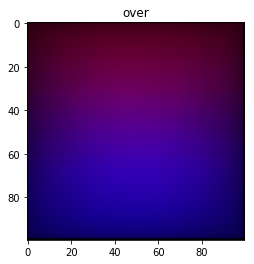

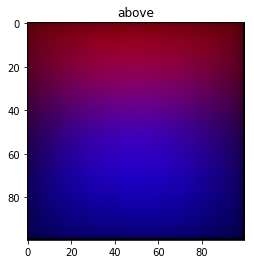

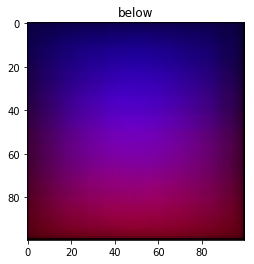

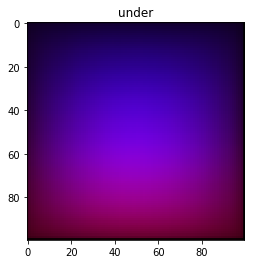

In [17]:
for rel in prepositions:
    trg, lnd = prepositions_bboxes_mask_mean[rel]
    # add dummy zero value dimension in green channel. target in red, and landmark in blue channels:
    plt.imshow(np.array([2*trg, np.zeros(trg.shape), 2*lnd]).T)
    plt.title(rel)
    plt.show()

#### Measure mean and variance

In [18]:
prepositions_bboxes_mean = {
    p: prepositions_bboxes[p].mean(0)
    for p in prepositions_bboxes
}

prepositions_bboxes_std = {
    p: prepositions_bboxes[p].std(0).mean()
    for p in prepositions_bboxes
}

In [19]:
prepositions_bboxes_std

{'over': 0.2583391057270448,
 'above': 0.2571701224269083,
 'below': 0.26182530489328115,
 'under': 0.26302452068958615}